## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Adding features in dataset


In [1]:

# Function to preprocess images
def preprocess_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply Gaussian smoothing
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # 5 5 is kernel size and 0 is sstandard daviation 
    
    # Apply Otsu's thresholding
    thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Apply morphological transformation (dilation)
    kernel = np.ones((5,5),np.uint8)
    morphed = cv2.dilate(thresholded, kernel, iterations=2)
    
    # Bitwise AND operation with original image for color feature
    color_feature = cv2.bitwise_and(image, image, mask=morphed)
    
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Define lower and upper bounds for green in HSV
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([70, 255, 255])
    
    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Bitwise AND operation with original image for green part of the leaf
    green_part = cv2.bitwise_and(image, image, mask=mask)
    
    return gray, blurred, thresholded, morphed, color_feature, green_part


## Functions to preprocess on dataset

In [7]:
def preprocess_dataset(dataset):
    preprocessed_images = []
    labels = []
    for image_batch, label_batch in dataset:
        preprocessed_batch = []
        for image in image_batch:
            preprocessed = preprocess_image(image.numpy())
            preprocessed_batch.append(preprocessed)
        preprocessed_images.append(preprocessed_batch)
        labels.append(label_batch)
    return preprocessed_images, labels


## data preprocessing
### Training image preprocessing

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70296 files belonging to 38 classes.


## Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Preprocess data

In [9]:
# Preprocess datasets
preprocessed_training_images, training_labels = preprocess_dataset(training_set)
preprocessed_validation_images, validation_labels = preprocess_dataset(validation_set)
for x,y in preprocessed_training_images:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[158.75 155.75 162.75]
   [177.5  174.5  181.5 ]
   [160.5  157.5  164.5 ]
   ...
   [158.75 157.75 165.75]
   [165.   164.   172.  ]
   [161.75 160.75 168.75]]

  [[178.5  175.5  182.5 ]
   [172.5  169.5  176.5 ]
   [164.25 161.25 168.25]
   ...
   [154.75 153.75 161.75]
   [155.75 154.75 162.75]
   [165.   164.   172.  ]]

  [[163.5  160.5  167.5 ]
   [177.25 174.25 181.25]
   [158.5  155.5  162.5 ]
   ...
   [143.5  142.5  150.5 ]
   [146.5  145.5  153.5 ]
   [153.5  152.5  160.5 ]]

  ...

  [[201.   200.   206.  ]
   [198.   197.   203.  ]
   [195.75 194.75 200.75]
   ...
   [173.   175.   188.  ]
   [163.5  165.5  178.5 ]
   [164.25 166.25 179.25]]

  [[195.25 194.25 200.25]
   [194.75 193.75 199.75]
   [195.75 194.75 200.75]
   ...
   [165.25 167.25 180.25]
   [176.   178.   191.  ]
   [174.75 176.75 189.75]]

  [[197.25 196.25 202.25]
   [196.   195.   201.  ]
   [195.75 194.75 200.75]
   ...
   [174.75 176.75 189.75]
   [180.   182.   195.  ]
   [173.75 175.75 18

## To avoid Overshooting Loss function
#### 1.learning rate default 0.001 here we have taken 0.0001
#### 2.for reducing  underfitting increase number of neuron
#### 3.Adding more Convolutional Layer to extract more feature 

## Building Model


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())


In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1827s 828ms/step - accuracy: 0.3960 - loss: 2.1531 - val_accuracy: 0.8449 - val_loss: 0.4921
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1443s 657ms/step - accuracy: 0.8391 - loss: 0.5115 - val_accuracy: 0.9146 - val_loss: 0.2677
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1468s 668ms/step - accuracy: 0.9045 - loss: 0.2974 - val_accuracy: 0.9378 - val_loss: 0.1963
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1470s 669ms/step - accuracy: 0.9333 - loss: 0.2050 - val_accuracy: 0.9446 - val_loss: 0.1683
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2374s 1s/step - accuracy: 0.9514 - loss: 0.1505 - val_accuracy: 0.9537 - val_loss: 0.1486
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2542s 1s/step - accuracy: 0.9611 - loss: 0.1169 - val_accuracy: 0.9365 - val_loss: 0.2024
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2341s 1s/step - accuracy: 0.9701 - loss: 0.0903 - val_accuracy: 0.9557 - val_loss: 0.1476
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1480s 673ms/step - acc


## Evaluating Model

In [47]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 897s 408ms/step - accuracy: 0.9915 - loss: 0.0255
Training accuracy: 0.9927307367324829


In [48]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 224s 407ms/step - accuracy: 0.9692 - loss: 0.1119
Validation accuracy: 0.9698383808135986


### Saving Model

In [30]:
cnn.save('trained_plant_disease_model10.keras')

In [32]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6009588241577148,
  0.8607744574546814,
  0.9144474864006042,
  0.9387589693069458,
  0.9552606344223022,
  0.9639097452163696,
  0.9719187617301941,
  0.9759161472320557,
  0.9801837801933289,
  0.9824172258377075],
 'loss': [1.3545082807540894,
  0.43949493765830994,
  0.2651650607585907,
  0.18629442155361176,
  0.13733310997486115,
  0.1087869182229042,
  0.0860089436173439,
  0.07579933106899261,
  0.06145890802145004,
  0.05471326410770416],
 'val_accuracy': [0.8448668122291565,
  0.9145799875259399,
  0.937798798084259,
  0.9446278214454651,
  0.9536762833595276,
  0.9364898800849915,
  0.9557250142097473,
  0.9578875303268433,
  0.9659116864204407,
  0.9698383808135986],
 'val_loss': [0.4921260178089142,
  0.2677134871482849,
  0.19626912474632263,
  0.1683083474636078,
  0.14855776727199554,
  0.2023637890815735,
  0.14761745929718018,
  0.14158238470554352,
  0.11771664768457413,
  0.10628887265920639]}

In [33]:
#Recording History in json
import json
with open('training_hist10.json','w') as f:
  json.dump(training_history.history,f)

In [34]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Accuracy Visualization

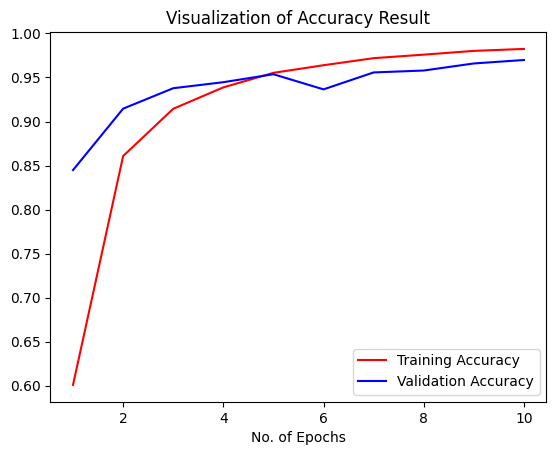

In [35]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [36]:
class_name = validation_set.class_names

In [37]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [39]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 347s 20ms/step


In [46]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [41]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [44]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.94      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.98       440
                                   Apple___healthy       0.98      0.98      0.98       502
                               Blueberry___healthy       0.99      0.92      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.96      0.

## Confusion Matrix Visualization

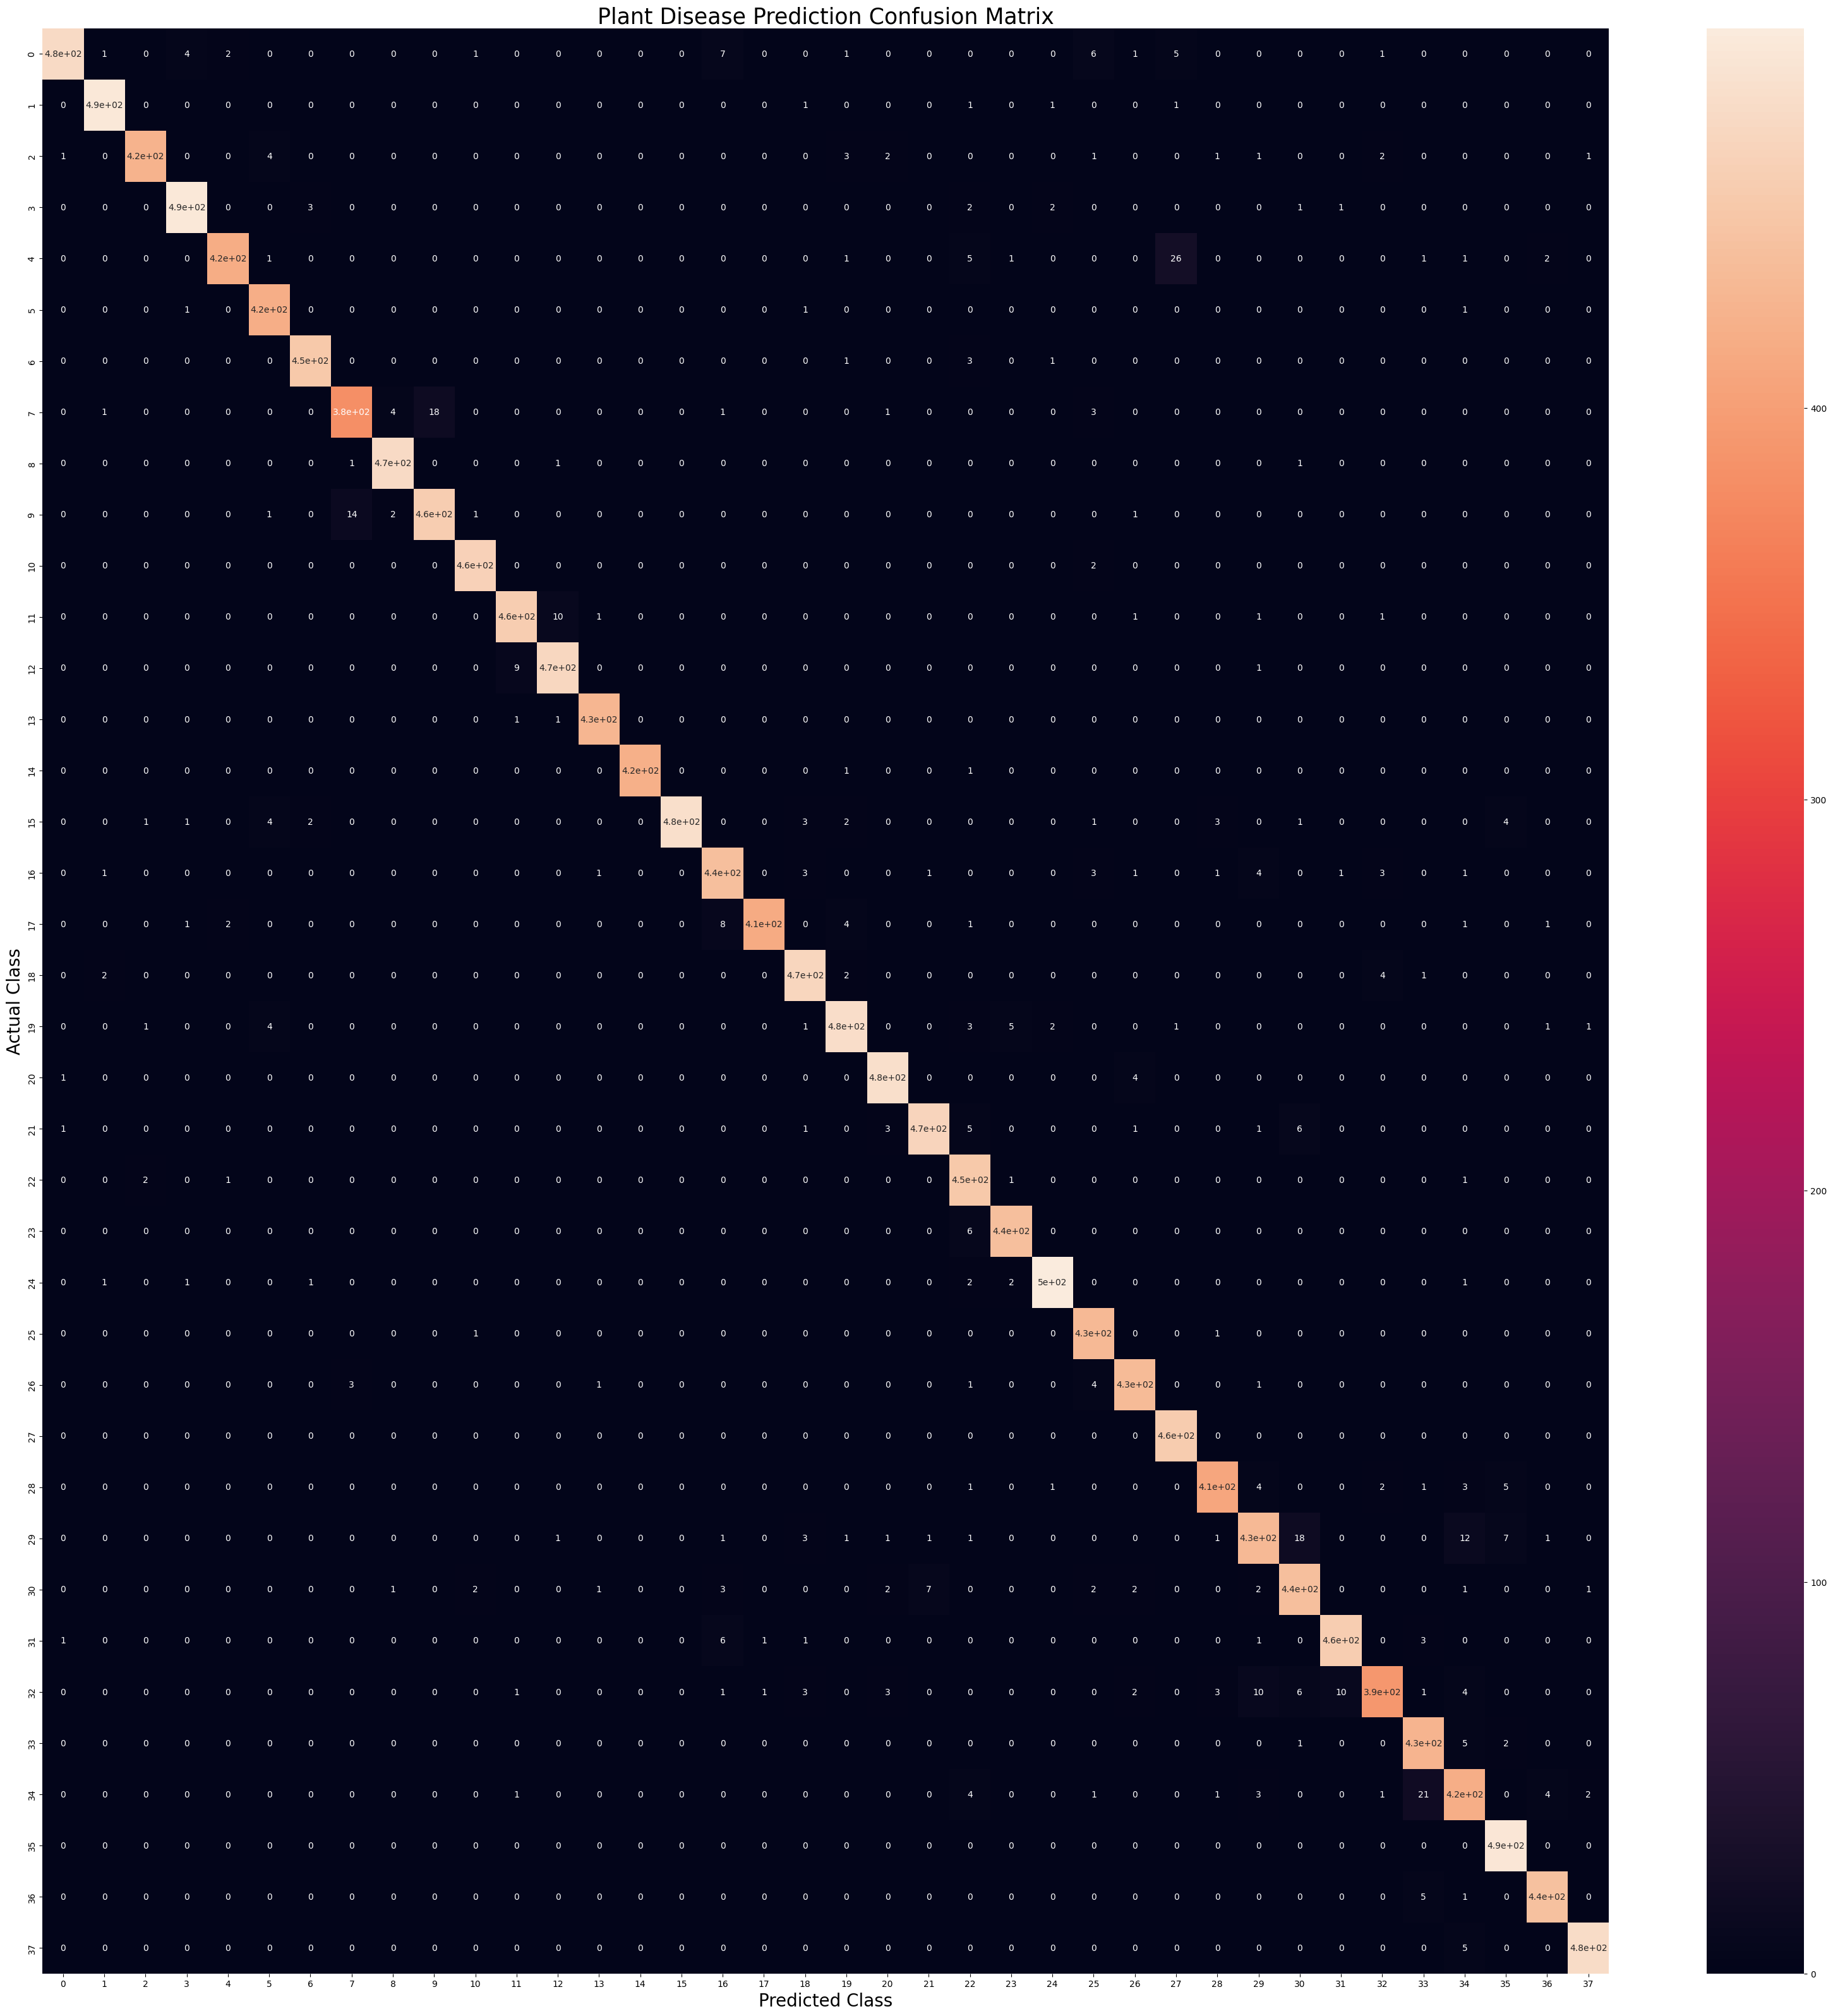

In [45]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()